In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import axes3d
import os, os.path
import glob
import sys
import scipy
from scipy.optimize import curve_fit
import re

In [10]:
#Define the Gaussian function
def Gauss(x, *p):
    H, A, x0, sigma = p
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

data_directory = './Preliminary_runs'

sweep_f2b_exist = False
ignore_f2b = True
if (sweep_f2b_exist != True): 
    ignore_f2b = True

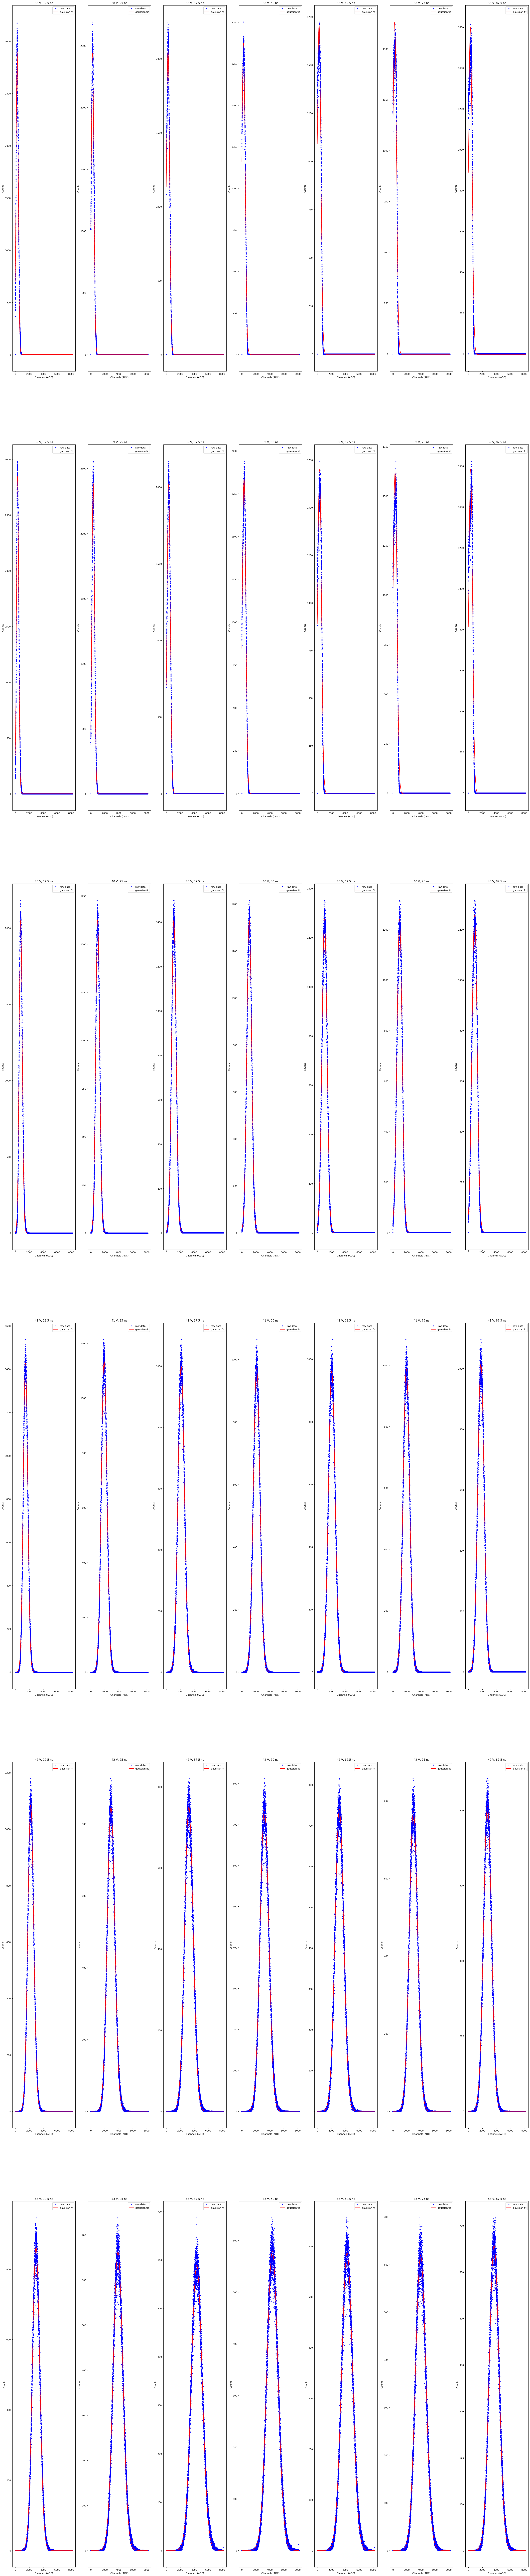

In [11]:
signal_mean = []
num_of_led_hist = len(glob.glob1(data_directory + "/LED_runs/","*_HG_0_0.txt"))
volt_list = []
st_list = []

end_run = int(num_of_led_hist)
if (sweep_f2b_exist == True and ignore_f2b == True):
    end_run = int(num_of_led_hist / 2)

def led_plotter(end_run, start_run = 1):

    fig = plt.figure(figsize = (40,200))
    for i in range(start_run, end_run  + 1):
        config = str(data_directory + '/LED_runs/Run' + str(i) + '_Info.txt')
        file1 = open(config,'r')
        temp_list = file1.readlines()
        run_volt = (str(temp_list[39])[30:45]).strip()
        volt_list.append(run_volt)
        run_st = (str(temp_list[119])[30:45]).strip()
        st_list.append(run_st)

    vrr = {i:volt_list.count(i) for i in volt_list}
    vrray = np.reshape(np.array([[val] for (key,val) in vrr.items()]),-1)
    srr = {i:st_list.count(i) for i in st_list}
    srray = np.reshape(np.array([[val] for (key,val) in srr.items()]),-1)

    if (np.all(vrray == vrray[0]) & np.all(srray == srray[0]) != True):
        raise ValueError("The sweep is missing some voltages or shaping times")
        if (np.all(vrray == vrray[0]) != True):
            raise ValueError("The sweep is missing some voltages, check the dataset")
        if (np.all(srray == srray[0]) != True):
            raise ValueError("The sweep is missing some shaping times, check the dataset")
        sys.exit(1)

    for i in range(0, end_run - start_run + 1): 
        file_name = data_directory + '/LED_runs/Run' + str(i+start_run) + '_PHA_HG_0_0.txt'
        data = np.loadtxt(file_name) 
        p0 = [0,np.amax(data),np.argmax(data),100]
        parameters, covariance = curve_fit(Gauss, np.arange(len(data)) , data, p0)
        H = parameters[0]
        A = parameters[1]
        x0 = parameters[2]
        sigma = parameters[3]
        fit = Gauss(np.arange(len(data)),H,A,x0,sigma)
        signal_mean.append([(volt_list[i] + ", " + st_list[i]), x0])
        ax = plt.subplot(len(vrray),len(srray),i+1)
        plt.gca().set_title(volt_list[i] + ", " + st_list[i])
        ax.plot(np.arange(len(data)), data, 'b.', label = 'raw data')
        ax.set_xlabel("Channels (ADC)")
        ax.set_ylabel("Counts")
        ax.plot(np.arange(len(data)), fit, 'r-', label = 'gaussian fit')
        ax.legend()
    #if start_run == 1:
        #fig.suptitle("Signal Mean vs. Shaping Time, Sweep Up")
    #elif start_run == num_of_led_hist + 1:
        #fig.suptitle("Signal Mean vs. Shaping Time, Sweep Down")
    plt.show()
# copy this entire cell, but apply it to the pedestal runs

led_plotter(end_run = end_run, start_run = 1)
# Sweep Down
# led_plotter(end_run = num_of_led_hist, start_run = end_run + 1)

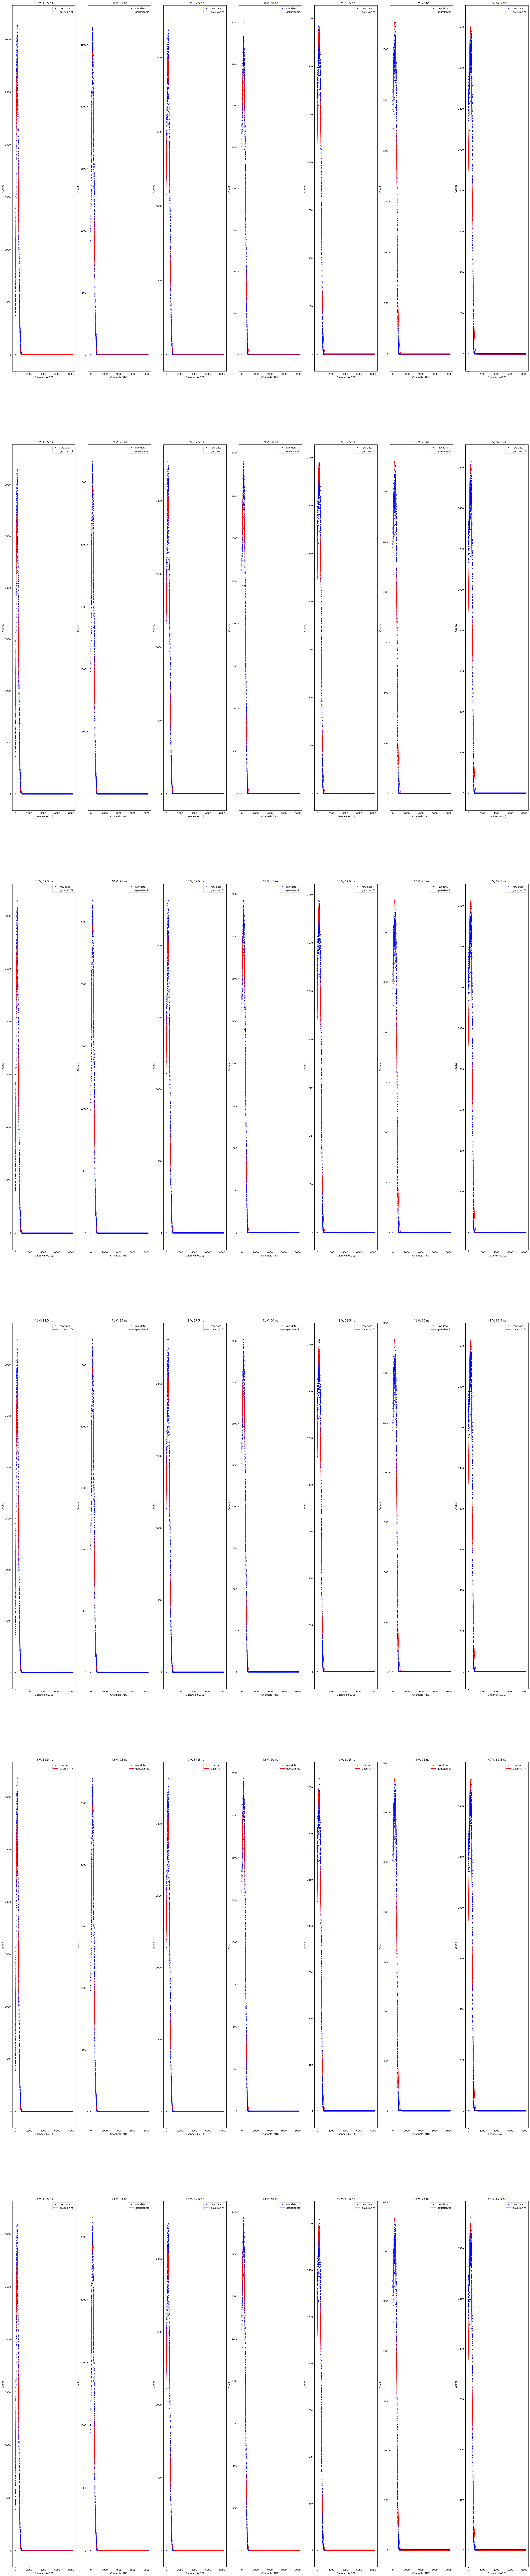

In [12]:
pedestal_std = []
num_of_ped_hist = len(glob.glob1( data_directory + "/Pedestal_runs/","*_HG_0_0.txt"))
volt_list = []
st_list = []

end_run = int(num_of_ped_hist)
if (sweep_f2b_exist == True and ignore_f2b == True):
    end_run = int(num_of_ped_hist / 2)

def ped_plotter(end_run, start_run = 1):

    plt.figure(figsize = (40,200))
    for i in range(start_run, end_run  + 1):
        config = str(data_directory + '/Pedestal_runs/Run' + str(i) + '_Info.txt')
        file1 = open(config,'r')
        temp_list = file1.readlines()
        run_volt = (str(temp_list[39])[30:45]).strip()
        volt_list.append(run_volt)
        run_st = (str(temp_list[119])[30:45]).strip()
        st_list.append(run_st) 
           
    vrr = {i:volt_list.count(i) for i in volt_list}
    vrray = np.reshape(np.array([[val] for (key,val) in vrr.items()]),-1)
    srr = {i:st_list.count(i) for i in st_list}
    srray = np.reshape(np.array([[val] for (key,val) in srr.items()]),-1)

    if (np.all(vrray == vrray[0]) & np.all(srray == srray[0]) != True):
        raise ValueError("The sweep is missing some voltages or shaping times")
        if (np.all(vrray == vrray[0]) != True):
            raise ValueError("The sweep is missing some voltages, check the dataset")
        if (np.all(srray == srray[0]) != True):
            raise ValueError("The sweep is missing some shaping times, check the dataset")
        sys.exit(1)

    for i in range(0, end_run - start_run + 1): 
        file_name = data_directory + '/Pedestal_runs/Run' + str(i+start_run) + '_PHA_HG_0_0.txt'
        data = np.loadtxt(file_name) 
        p0 = [0,np.amax(data),np.argmax(data),100]
        parameters, covariance = curve_fit(Gauss, np.arange(len(data)) , data, p0)
        H = parameters[0]
        A = parameters[1]
        x0 = parameters[2]
        sigma = parameters[3]
        fit = Gauss(np.arange(len(data)),H,A,x0,sigma)
        pedestal_std.append([(volt_list[i] + ", " + st_list[i]), sigma])
        ax = plt.subplot(len(vrray),len(srray),i+1)
        plt.gca().set_title(volt_list[i] + ", " + st_list[i])
        ax.plot(np.arange(len(data)), data, 'b.', label = 'raw data')
        ax.set_xlabel("Channels (ADC)")
        ax.set_ylabel("Counts")
        ax.plot(np.arange(len(data)), fit, 'r-', label = 'gaussian fit')
        ax.legend()
    plt.show()

ped_plotter(end_run = end_run, start_run = 1)
# Sweep Down
#ped_plotter(end_run = num_of_ped_hist, start_run = end_run + 1)

[[38.         12.5         1.69374125]
 [38.         25.          1.31496645]
 [38.         37.5         1.10137904]
 [38.         50.          0.97732155]
 [38.         62.5         0.95605682]
 [38.         75.          0.99682984]
 [38.         87.5         1.09604149]
 [39.         12.5         2.0661286 ]
 [39.         25.          1.79048567]
 [39.         37.5         1.51353466]
 [39.         50.          1.31299263]
 [39.         62.5         1.20767874]
 [39.         75.          1.19732837]
 [39.         87.5         1.25558189]
 [40.         12.5         4.78273831]
 [40.         25.          5.11889091]
 [40.         37.5         4.8563889 ]
 [40.         50.          4.38090685]
 [40.         62.5         4.00392712]
 [40.         75.          3.69939476]
 [40.         87.5         3.50646822]
 [41.         12.5         9.03130441]
 [41.         25.          9.94807982]
 [41.         37.5         9.63800641]
 [41.         50.          8.85687808]
 [41.         62.5       

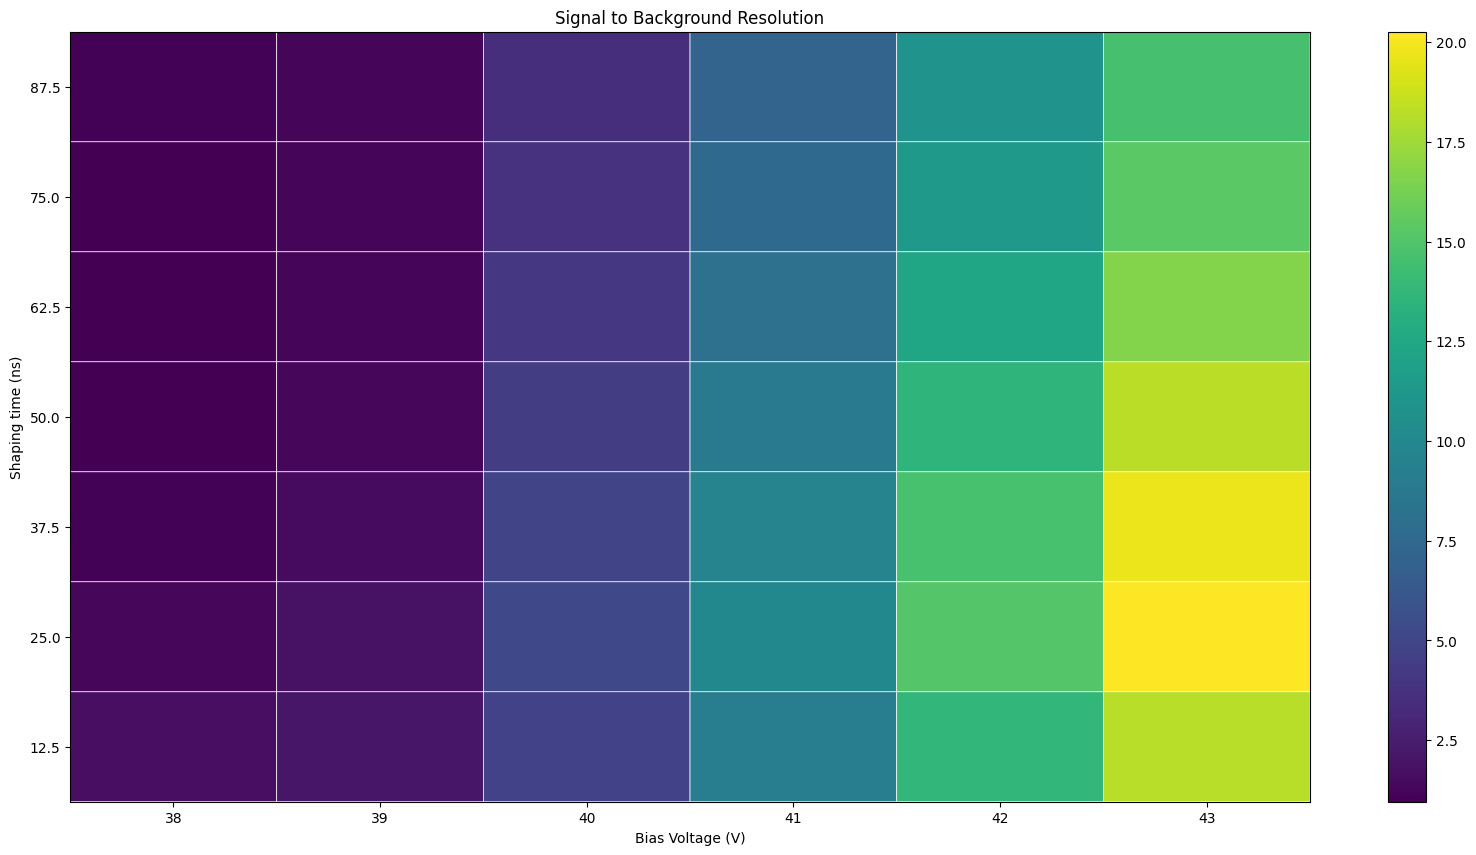

In [13]:
def SB_res():
    final_data = np.empty(shape=[0,3])
    #print(signal_mean)
    for i in range(0,len(signal_mean)):
        for j in range(0,len(pedestal_std)):
            if signal_mean[i][0] in pedestal_std[j][0]:
                sweep_info = signal_mean[i][0].split(",")
                bias_v = float(re.search("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", str(sweep_info[0])).group())
                shape_t = float(re.search("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", str(sweep_info[1])).group())
                resolution = signal_mean[i][1]/pedestal_std[j][1]
                final_data = np.append(final_data,[[bias_v,shape_t,resolution]],axis=0)
    fig = plt.figure(figsize = (20,10))
    bias_v = final_data[:,0]
    shape_t = final_data[:,1]
    resolution = final_data[:,2]
    print (final_data)
    bias_v , num_of_v = np.unique(bias_v, return_counts = True)

    shape_t = np.unique(shape_t)
    #for res, np.flip(resolution) for sweep down, resolution for sweep up
    res = resolution.reshape(len(bias_v),len(shape_t))
    ax = fig.add_subplot(111)
    #res for sweep down, np.transpose(res) for sweep up
    cax = ax.pcolor(bias_v, shape_t, np.transpose(res), vmin=np.min(res), edgecolors='w', linewidths=0.5, vmax=np.max(res),cmap='viridis')
    fig.colorbar(cax)

    ax.set_xticks(bias_v)
    ax.set_yticks(shape_t)
    ax.set_title('Signal to Background Resolution')
    ax.set_xlabel('Bias Voltage (V)')
    ax.set_ylabel('Shaping time (ns)')

    plt.show()
SB_res()

In [14]:
#led_plotter(end_run = num_of_led_hist, start_run = end_run + 1)

In [15]:
#ped_plotter(end_run = num_of_led_hist, start_run = end_run + 1)

In [16]:
#print(resolution)
#SB_res()

sweep down
[41.         12.5         5.95991217]
[44.5        87.5        11.75261135]

sweep up
[41.         12.5         5.72828428]
[44.5        87.5        11.70995223]